<a href="https://colab.research.google.com/github/snapdotNG/StatisticalArbitrageCCXT/blob/main/StatisticalArbitrageCCXT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip -q install ccxt pandas_ta schedule python-binance arch plotly==5.4.0

In [ ]:
import ccxt,pytz,time,schedule, requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import pandas_ta as ta
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import clear_output
import matplotlib.pyplot as plt
from binance.client import Client
from pprint import pprint
import statsmodels.regression.linear_model as rg
import arch.unitroot as at
from sklearn.preprocessing import MinMaxScaler


No handles with labels found to put in legend.
No handles with labels found to put in legend.


         time    open    high     low   close   volume        rsi       roc
192  05:14:10  163.23  163.23  162.81  162.84   6455.0  26.042230 -0.269476
193  05:14:11  162.84  162.84  162.33  162.64  13020.0  21.826224 -0.269806
194  05:14:12  162.64  162.89  162.38  162.50   6745.0  19.118060 -0.367872
195  05:14:13  162.54  162.54  162.12  162.30   8273.0  15.650418 -0.685351
196  05:14:14  162.29  162.32  161.75  162.15  20428.0  13.375921 -0.667728
197  05:14:15  162.18  162.26  161.74  162.26   8195.0  23.559375 -0.356178
198  05:14:16  162.20  162.61  162.19  162.33   4024.0  30.096280 -0.190605
199  05:14:17  162.33  162.36  162.33  162.33     26.0  30.096280 -0.104615
         time    open    high     low   close   volume       rsi2      roc2
192  05:14:10  29.132  29.140  29.050  29.059  17793.2  31.998352 -0.250584
193  05:14:11  29.055  29.074  28.981  29.009  43157.4  26.052515 -0.213271
194  05:14:12  29.010  29.057  28.936  28.971  44164.1  22.143593 -0.429612
195  05:14:1

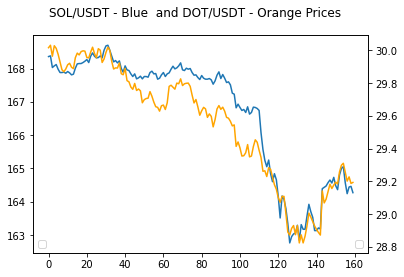

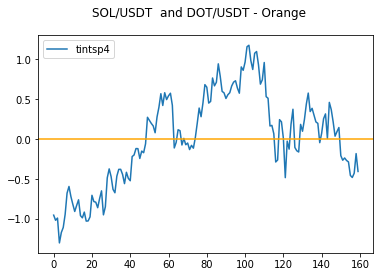

== GER Prices Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.608
P-value                         0.789
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.02 (1%), -3.44 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== FRA Prices Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.899
P-value                         0.655
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.02 (1%), -3.44 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== GER Prices Differences Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic           

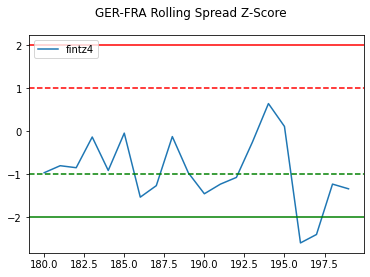

160    05:13:38
161    05:13:39
162    05:13:40
163    05:13:41
164    05:13:42
165    05:13:43
166    05:13:44
167    05:13:45
168    05:13:46
169    05:13:47
170    05:13:48
171    05:13:49
172    05:13:50
173    05:13:51
174    05:13:52
175    05:13:53
176    05:13:54
177    05:13:55
178    05:13:56
179    05:13:57
180    05:13:58
181    05:13:59
182    05:14:00
183    05:14:01
184    05:14:02
185    05:14:03
186    05:14:04
187    05:14:05
188    05:14:06
189    05:14:07
190    05:14:08
191    05:14:09
192    05:14:10
193    05:14:11
194    05:14:12
195    05:14:13
196    05:14:14
197    05:14:15
198    05:14:16
199    05:14:17
Name: ftime, dtype: object
printing test here check if  time shows below in dg and fintz below
    spread  timeRoller
22     182   -0.844377
23     183   -0.131414
24     184   -0.908398
25     185   -0.041214
26     186   -1.528018
27     187   -1.261150
28     188   -0.121413
29     189   -0.962964
30     190   -1.449505
31     191   -1.226227
32     192  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 Scanning for new signal between SOL/USDT and DOT/USDT


In [ ]:

def check():
  API_KEY2 = 'SomeKeyValueHere2'
  API_SECRET2 = 'SomeValueValueHere2'
  API_KEY = 'SomeKeyValueHere'
  API_SECRET = 'SomeSecretValueHere'

  client = Client(API_KEY, API_SECRET)

  exchangepub = ccxt.binance()
  #bybit
  exchangepub2 = ccxt.bybit

  exchange_id = 'binanceusdm'
  exchange_class = getattr(ccxt, exchange_id)
  exchange = exchange_class({
      'apiKey': API_KEY,
      'secret': API_SECRET,
      'timeout': 3333,
      'enableRateLimit': True,
  })

  exchange_id2 = 'binanceusdm'
  exchange_class = getattr(ccxt, exchange_id2)
  exchange2 = exchange_class({
      'apiKey': API_KEY,
      'secret': API_SECRET,
      'timeout': 3333,
      'enableRateLimit': True,
  })

  pair1 = "SOL/USDT"
  pair2 = "DOT/USDT"
  pair3 = "ETH/USDT"
  part4 = "MASK/USDT"
  timeframe='1m'
  limit= 200
  timer =534
  #Set time to display EST and not UTC
  est = pytz.timezone('US/Eastern')
  utc = pytz.utc
  timeNow = (datetime.now().astimezone(est)).strftime('%d:%H:%M')

  #Get market data
  markets = exchange.fetch_ohlcv(pair1, timeframe=timeframe,limit= limit)
  df = pd.DataFrame(markets, columns=["time", "open", "high", "low", "close", "volume"])
  df['time']=pd.to_datetime(df['time'],unit='ms').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
  df['time'] = df['time'].dt.strftime('%d:%H:%M')
  df['rsi'] = df.ta.rsi(5, append=False)
  df['roc'] = df.ta.roc(5, append=False)
  #df['roc'] = df.ta.roc(5, append=False)

  markets = exchange2.fetch_ohlcv(pair2, timeframe=timeframe,limit= limit)
  df2 = pd.DataFrame(markets, columns=["time", "open", "high", "low", "close", "volume"])
  df2['time']=pd.to_datetime(df2['time'],unit='ms').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
  df2['time'] = df2['time'].dt.strftime('%d:%H:%M')
  df2['rsi2'] = df2.ta.rsi(5, append=False)
  df2['roc2'] = df2.ta.roc(5, append=False)

  markets = exchange.fetch_ohlcv(pair3, timeframe=timeframe,limit= limit)
  df3 = pd.DataFrame(markets, columns=["time", "open", "high", "low", "close", "volume"])
  df3['time']=pd.to_datetime(df3['time'],unit='ms').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
  df3['time'] = df3['time'].dt.strftime('%d:%H:%M')



  print(df.tail(8))
  
  print(df2.tail(8))
  print('here testing')
  df['rsiDelta']= (df['rsi']) - (df2['rsi2'])
  df['r2'] = df2['rsi2']
  df['rocDelta']= (df['roc']) - (df2['roc2']) * 100
  #df['roc2'] = df2['roc2']
  x1 = df['close']
  x2 = df2['close']

  # create a scaler object
  scaler = MinMaxScaler(feature_range= (0,10))
  #scaler = MinMaxScaler() 
  #x1 = x1.reshape(1,-1)
  import numpy as np
  x1 = np.array(x1.tolist())
  x1 = x1.reshape(-1,1)
  x2 = np.array(x2.tolist())
  x2 = x2.reshape(-1,1)
  scaled_values1 = scaler.fit_transform(x1) 
  x1 = scaled_values1

  scaled_values2 = scaler.fit_transform(x2) 
  x2 = scaled_values2
    
  df['standard1'] = x1
  df['standard2'] = x2
  df['scaled'] = df['standard1'] - df['standard2']
  
  print(df.tail(8))
  dplot = df
  print(df2.tail(8))
  #print(df3)
  
  #calculate Cointspread
  df['ger'] = df['close']
  df['fra'] = df2['close']
  data = df
  df['time']
  int4 = data.loc[:, ['time','ger', 'fra','r2', 'rsiDelta']]
  #int1 = df.loc[:, ['open', 'close']]
  lendF = (len(int4))
  tLendF = int((8/10) * lendF)
  fLendF = int (lendF - tLendF)
  tint4 = int4[:tLendF]
  tint4.columns = ['ttime','tger', 'tfra','tr2','trsiDelta']
  fint4 = int4[tLendF:]
  fint4.columns = ['ftime','fger', 'ffra','fr2', 'frsiDelta']


  ##########

  # 3. Pairs Identification

  # 3.1. GER-FRA Returns Calculation
  tger = tint4['tger']
  tfra = tint4['tfra']
  rtger = tger.pct_change(1).dropna()
  rtfra = tfra.pct_change(1).dropna()

  # 3.2. GER-FRA Returns Correlation
  print('')
  print(f'{pair1} - Blue  and {pair2} - Orange Prices')
  print('')
  print(np.round(pd.DataFrame(rtger).join(rtfra).corr(), 4))
  print('')

  # 3.3. GER-FRA Prices Chart
  fig1, ax1 = plt.subplots()
  ax1.plot(tger)
  ax1.legend(loc='lower left')
  ax2 = ax1.twinx()
  ax2.plot(tfra, color='orange')
  ax2.legend(loc='lower right')
  plt.suptitle(f'{pair1} - Blue  and {pair2} - Orange Prices')
  plt.show()

  ##########

  # 4. Pairs Spread Co-Integration

  # 4.1. GER-FRA Spread Calculation
  # OLS regression doesn't include constant
  tintsp4 = tger - rg.OLS(tger, tfra).fit().params[0] * tfra

  # 4.2. GER-FRA Spread Chart
  fig2, ax = plt.subplots()
  ax.plot(tintsp4, label='tintsp4')
  ax.axhline(tintsp4.mean(), color='orange')
  ax.legend(loc='upper left')
  plt.suptitle(f'{pair1}  and {pair2} - Orange ')
  plt.show()

  # 4.3. GER-FRA Non-Stationary Prices
  print('== GER Prices Augmented Dickey-Fuller Test ==')
  print('')
  print(at.ADF(tger, trend='ct'))
  print('')
  print('== FRA Prices Augmented Dickey-Fuller Test ==')
  print('')
  print(at.ADF(tfra, trend='ct'))
  print('')

  # 4.4. GER-FRA Stationary Price Differences
  print('== GER Prices Differences Augmented Dickey-Fuller Test ==')
  print('')
  print(at.ADF(tger.diff(1).dropna(), trend='ct'))
  print('')
  print('== FRA Prices Differences Augmented Dickey-Fuller Test ==')
  print('')
  print(at.ADF(tfra.diff(1).dropna(), trend='ct'))
  print('')

  # 4.5. GER-FRA Spread Co-Integration Tests
  print('== GER-FRA Spread Augmented Dickey-Fuller Co-Integration Test ==')
  print(at.ADF(tintsp4, trend='ct'))
  print('== GER-FRA Spread Phillips-Perron Co-Integration Test ==')
  print(at.PhillipsPerron(tintsp4, trend='ct', test_type='rho'))


  ##########

  # 5. Pairs Trading Strategy

  # 5.1. GER-FRA Rolling Spread Z-Score Calculation
  fger = fint4['fger']
  ffra = fint4['ffra']
  ftime = fint4['ftime']
  fintsp4 = fger - rg.OLS(tger, tfra).fit().params[0] * ffra
  fintz4 = (fintsp4 - fintsp4.rolling(window=21).mean()) / fintsp4.rolling(window=21).std()
 
  # 5.2. GER-FRA Rolling Spread Z-Score Chart
  fig3, ax = plt.subplots()
  ax.plot(fintz4, label='fintz4')
  ax.axhline((-2), color='green')
  ax.axhline((-1), color='green', linestyle='--')
  ax.axhline((2), color='red')
  ax.axhline((1), color='red', linestyle='--')
  ax.legend(loc='upper left')
  plt.suptitle('GER-FRA Rolling Spread Z-Score')
  plt.show()
  fintz4plotly = fintz4.to_frame().reset_index()
  print ( ftime )

  print("printing test here check if  time shows below in dg and fintz below")
  
  df = fintz4plotly
  df = df[22:]
  ftime = ftime[22:]
  #dg =pd.merge(df, ftime, on = None,left_index=True)
  
  df.rename(columns={'': 'timeRoll', 'index': 'spread'}, inplace=True)
  df.rename(columns={ df.columns[1]: "timeRoller" }, inplace = True)
  print(df)

  ft = ftime
  print((ft.describe()))
  currentVal = dplot['rsiDelta'].iloc[-1]

  fig = px.line(df, y="timeRoller", x= ftime, title=f'Current deviation is: {currentVal}')
  #fig = px.line(df, y='timeRoll', x= dplot['time'], title=f'Current deviation is: {currentVal}')
  fig.add_hline(y=-2, line_width=3, line_dash="dash", line_color="green")
  fig.add_hline(y=-1, line_width=3, line_dash="dash", line_color="red")
  fig.add_hline(y=1, line_width=3, line_dash="dash", line_color="yellow")
  fig.add_hline(y=2, line_width=3, line_dash="dash", line_color="blue")
  fig.show()

  fig = px.line(dplot, y='rsiDelta', x= 'time', title=f'Current deviation is: {currentVal}')
  fig.add_hline(y=-30, line_width=3, line_dash="dash", line_color="green")
  fig.add_hline(y=-10, line_width=3, line_dash="dash", line_color="red")
  fig.add_hline(y=10, line_width=3, line_dash="dash", line_color="yellow")
  fig.add_hline(y=30, line_width=3, line_dash="dash", line_color="blue")
  fig.show()
  #dplot
  #fig = px.histogram(dplot['rsiDelta'], x="time")
  fig = px.histogram(dplot, x = 'time', y='rsiDelta')
  #fig.add_hline(y=-30, line_width=3, line_dash="dash", line_color="green")
  fig.add_hline(y=-10, line_width=3, line_dash="dash", line_color="red")
  fig.add_hline(y=10, line_width=3, line_dash="dash", line_color="yellow")
  #fig.add_hline(y=30, line_width=3, line_dash="dash", line_color="blue")
  fig.update_layout(bargap=0.2)
  fig.show()

  fig = px.histogram(dplot, x = 'time', y='rocDelta')
  #fig.add_hline(y=-10, line_width=3, line_dash="dash", line_color="green")
  fig.add_hline(y=-5, line_width=3, line_dash="dash", line_color="red")
  fig.add_hline(y=10, line_width=3, line_dash="dash", line_color="yellow")
  #fig.add_hline(y=5, line_width=3, line_dash="dash", line_color="blue")
  fig.update_layout(bargap=0.2)
  fig.show()

  #Telegram Notification
  signal = "testValue"

  def telecast (signal):
    import requests
    base_url = "https://api.telegram.org/bot1962000000:AAGL3UaG9WOPutYoutKENWqeGKdAXXXXXXXX/sendMessage"

    parameters = {
      "chat_id" : "-100153007737XXXXXXX",
      # Private to Bot=="chat_id" : "1757790029XXXXXX",
      "text" : f'Update: {signal}'
    }
    resp = requests.get(base_url, data = parameters)
    a = resp.json()
    #print(a)

#telecast()

  if currentVal < -18:
    signal = f"Buy {pair1}  and Sell {pair2}. Current Value =====> {currentVal}"
    print(signal)
    telecast(signal)
  elif currentVal > 18:
    signal = f"Sell {pair1}  and Buy {pair2}. Current Value =====> {currentVal}"
    print(signal)
    telecast(signal)
  else:
    print(f" Scanning for new signal between {pair1} and {pair2}")

check()


def clear():
 clear_output()

#schedule.every().minute.at(":55").do(check)
#schedule.every().minute.at(":48").do(clear)
#schedule.every().minute.at(":41").do(check)
#schedule.every(2).minutes.at(":38").do(clear)
#schedule.every().minute.at(":40").do(check)
#schedule.every(60).seconds.do(clear)
#schedule.every(30).seconds.do(check)

#while True:
  #schedule.run_pending()
  #time.sleep(1)